## Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Fake news detector steps:
    ---->Dataset
    ---->preprocessing
    ---->NLP Techniques(bag of words,Tf,IDF,count vectorizer)
    ---->Model building
    ---->Evaluate and confusion Matrix

## Dataset Load and read first 5 records using head()method

In [12]:
df1=pd.read_csv('D:\\Machine Learning\\fakenews\\train.csv')
df1.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## columns

In [13]:
df1.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

## row and columns using shape method

In [14]:
df1.shape

(20800, 5)

## Find how many null values in dataset using isnull().sum()method
 if you use isnull() only that will place True in where are nullvalues but if you use isnull().sum() method that will sum of nullvalues

In [15]:
print(df1.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


## Drop Null values

In [16]:
df1=df1.dropna()

In [17]:
df=df1.copy()

when you Drop null values so some index will be change(collapse) so use reset_index method that will be solved

In [18]:
df.reset_index(inplace=True)

In [19]:
df['title'][8]

'Obama’s Organizing for Action Partners with Soros-Linked ‘Indivisible’ to Disrupt Trump’s Agenda'

## NLP Preprocessing techniques

In [20]:
import nltk

 stopwords-->remove stopwords(and,who,are,or...etc)
 
 porterstemmer--->(stemming)
 
 re--->regular expressions(remove patterns)

In [21]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [22]:
por_stem=PorterStemmer()
list1=[]

In [23]:
for i in range(0, len(df)):
    new=re.sub('[^a-zA-Z]', ' ',df['title'][i])
    new=new.lower()
    new=new.split()
    new=[por_stem.stem(word)for word in new if not word in stopwords.words('english')]
    new=' '.join(new)
    list1.append(new)

In [25]:
list1

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

## Feature extraction

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
x=cv.fit_transform(list1).toarray()

In [28]:
y=df1['label']

In [29]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [55]:
#y=df['label']

## Train test split

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [31]:
#cv.get_feature_names()[:5]

In [32]:
#cv.get_params()

In [33]:
#count_df=pd.DataFrame(x_train,columns=cv.get_feature_names())

In [34]:
#count_df

In [35]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()

In [36]:
from sklearn import metrics
import itertools

## Predict the model

In [37]:
MNB.fit(x_train,y_train)
pred=MNB.predict(x_test)
score=metrics.accuracy_score(y_test,pred)
score

0.9017499088589136

## Confusion matrix heatmap

In [38]:
import seaborn as sns

accuracy: 0.902


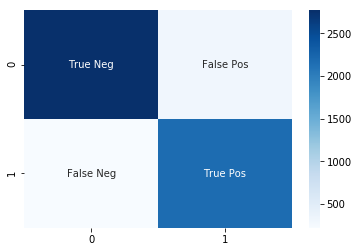

In [84]:
print("accuracy: %0.3f" % score)
cm=metrics.confusion_matrix(y_test,pred)
labels = ['True Neg','False Pos','False Neg','True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot=labels,fmt='',cmap='Blues')

## 1--> fake  0---->Real

In [39]:
data=['Indian Army blamed for minor boy killed by terrorists in kashmir']

vect=cv.transform(data).toarray()
pred=MNB.predict(vect)

In [40]:
pred

array([1], dtype=int64)